In [ ]:
/content/drive/MyDrive/wine.csv

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                780       
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dense_2 (Dense)             (None, 12)                372       
                                                                 
 dense_3 (Dense)             (None, 6)                 78        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 3067 (11.98 KB)
Trainable params: 3067 (11.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
20/20 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 0s 16ms/step - loss: 0.6643 - accuracy: 0.7483 - val_loss: 0.6140 - val_accuracy: 0.8338
Epoch 3/1000
20/20 [==============================] - 0s 19ms/step - loss: 0.5042 - accuracy: 0.8645 - val_loss: 0.3672 - val_accuracy: 0.8954
Epoch 4/1000
20/20 [==============================] - 0s 17ms/step - loss: 0.2813 - accuracy: 0.9112 - val_loss: 0.2549 - val_accuracy: 0.9215
Epoch 5/1000
20/20 [==============================] - 0s 15ms/step - loss: 0.2209 - accuracy: 0.9307 - val_loss: 0.2292 - val_accuracy: 0.9323
Epoch 6/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.2045 - accuracy: 0.9348 - val_loss: 0.2165 - val_accuracy: 0.9331
Epoch 7/1000
20/20 [==============================] - 0s 18ms/step - loss: 0.2007 - accuracy: 0.9351 - val_loss: 0.2125 - val_accuracy: 0.9315
Epoch 8/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.1959 - accuracy: 0.9382 - val_loss: 0.2107 - val_accuracy: 0.9323
Epoch 9/1000

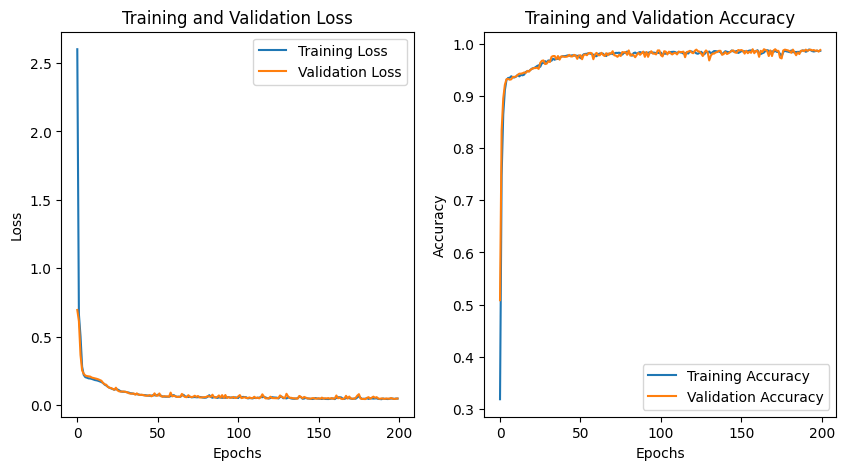

{'loss': [2.600937604904175, 0.6643075942993164, 0.5041690468788147, 0.28126224875450134, 0.22089800238609314, 0.2045118659734726, 0.20068691670894623, 0.19593070447444916, 0.194925457239151, 0.19177007675170898, 0.18772917985916138, 0.18345491588115692, 0.18141531944274902, 0.17809143662452698, 0.17374654114246368, 0.1689719706773758, 0.16174469888210297, 0.15018455684185028, 0.14348392188549042, 0.134743332862854, 0.12709064781665802, 0.1225162073969841, 0.11857223510742188, 0.11306393146514893, 0.11665932834148407, 0.11477510631084442, 0.1084328293800354, 0.10108282417058945, 0.09817536175251007, 0.0981777235865593, 0.09794724732637405, 0.09310631453990936, 0.0922732800245285, 0.08720007538795471, 0.08635449409484863, 0.08279690146446228, 0.08099193125963211, 0.07990049570798874, 0.07847028970718384, 0.07521075755357742, 0.07531335204839706, 0.07317843288183212, 0.0733734667301178, 0.07150784134864807, 0.06988856196403503, 0.0687759518623352, 0.06970986723899841, 0.07230717688798904

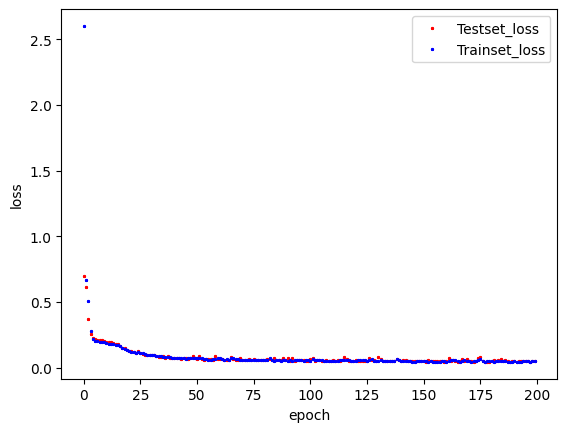

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov  2 20:59:37 2023

@author: Administrator
"""

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(60,  input_dim=12, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 저장 위치
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
modelpath = "D:/2023/model/bestmodel.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_accuracy', verbose=0, save_best_only=True)

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=1000, batch_size=200, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer]) # callbacks=[checkpointer]

# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

#loss 그래프 출력
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the training history
def plot_training_history(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')

    plt.show()

plot_training_history(history)

# del model
# from tensorflow.keras.models import load_model

# model = load_model('./data/model/all/46-0.9846.hdf5')
# loss, accuracy = model.evaluate(X_test, y_test)
# print('test test:', loss)
# print('test test:', accuracy)
print(history)
print(history.history) # 딕셔너리 타입
                       # {{'loss':, 'accuracy':,
                       # 'val_loss':, 'val_accuracy'::}

wine_loss_acc = pd.DataFrame(history.history)
wine_loss_acc.to_csv("wine_loss_acc.csv")

wine_loss_acc = pd.DataFrame(history.history)
wine_loss_acc.to_excel("wine_loss_acc.xlsx")

wine_epoch = pd.DataFrame(history.epoch)
wine_epoch.to_csv("wine_epoch.csv")

wine_params = pd.DataFrame([history.params])
wine_params.to_csv("wine_params.csv")

#history 내 추가 정보 확인 코드
# df_epoch = pd.DataFrame(history.epoch)
# df_param = pd.DataFrame([history.params])

#모델 내 파라미터(가중치, 바이어스) 값 확인 코드
# for layer in model.layers:
#     weights, biases = layer.get_weights()
#     print(f"{layer.name} 가중치의 형태: {weights.shape}")
#     print(weights)
#     print(f"{layer.name} 편향의 형태: {biases.shape}")
#     print(biases)

#모델 내 파라미터(가중치, 바이어스) 값 확인 코드
weights_df = pd.DataFrame()
biases_df = pd.DataFrame()

for layer in model.layers:
    weights, biases = layer.get_weights()

    weights_df[layer.name+'_weights'] = pd.Series(weights.flatten())
    weights_df[layer.name+'_biases'] = pd.Series(biases.flatten())
    print("가중치 :", end=' ')
    print(weights_df)
    print("바이어스 :", end=' ')
    print(biases_df)

weights_df.to_csv("D:/2023/weights.csv")
    # print(f"{layer.name} 가중치의 형태: {weights.shape}")
    # print(weights)
    # print(f"{layer.name} 편향의 형태: {biases.shape}")
    # print(biases)

# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
import numpy as np

y_vloss=wine_loss_acc['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=wine_loss_acc['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "*", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "*", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# "o": 원 모양
# "s": 사각형
# "^": 위쪽을 가리키는 삼각형
# "v": 아래쪽을 가리키는 삼각형
# "<": 왼쪽을 가리키는 삼각형
# ">": 오른쪽을 가리키는 삼각형
# "p": 오각형
# "h": 육각형
# "+": 플러스
# "x": 엑스




